# HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

This dataset is taken from kaggle https://www.kaggle.com/ludobenistant/hr-analytics

Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left


### Loading Datasets and exploring metadata

In [2]:
import pandas as pd
import numpy as np

In [3]:
hr_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1TwYF67jf31_JBiHqmBKCfuJMJxs7bJGF')

In [4]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
7565,0.95,0.77,3,184,4,0,0,0,sales,medium
3821,0.87,0.74,4,265,4,0,0,0,marketing,medium
10140,0.80,0.98,3,189,6,0,0,0,IT,low
6222,0.78,0.63,5,200,2,0,0,0,technical,low
5145,0.63,0.92,2,198,2,0,0,0,hr,low
3113,0.98,0.84,3,286,4,0,0,0,technical,medium
12504,0.78,0.83,4,217,6,0,1,0,support,medium
2863,0.77,0.67,3,186,2,0,0,0,technical,low
11018,0.32,0.86,4,214,5,0,0,0,sales,medium
2504,0.71,0.99,2,136,3,0,0,0,IT,low


In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Encoding Categorical Features

#### Exploring Categorical Features

In [8]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [12]:
salary_dict = { 'low' : 1,
                'medium': 2,
                'high': 4}

In [13]:
hr_df['salary'] = hr_df.salary.map(salary_dict)

In [14]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
3557,0.82,0.71,4,164,4,0,0,0,support,1
4069,0.83,0.69,4,232,2,0,0,0,sales,1
11882,0.60,0.45,3,104,4,0,0,0,IT,1
14236,0.89,0.92,5,242,5,0,1,0,sales,1
7109,0.78,0.91,4,202,2,0,0,0,sales,2
4119,0.66,0.62,4,250,2,0,0,0,RandD,2
10566,0.72,0.71,3,133,2,0,0,0,hr,1
1550,0.09,0.87,7,305,4,0,1,0,sales,2
364,0.40,0.50,2,141,3,1,1,0,technical,1
4222,0.98,0.87,4,152,2,0,0,0,sales,4


In [16]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['dept'] )

In [17]:
hr_encoded_df.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,False,True,False,False


In [19]:
hr_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
 9   dept_IT                14999 non-null  bool   
 10  dept_RandD             14999 non-null  bool   
 11  dept_accounting        14999 non-null  bool   
 12  dept_hr                14999 non-null  bool   
 13  dept_management        14999 non-null  bool   
 14  dept_marketing         14999 non-null  bool   
 15  de

### Setting X and Y Variables

In [21]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [23]:
X_features = list(hr_encoded_df.columns)

In [24]:
X_features.remove('left')

In [25]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical']

### Building a model all variables
#### Setting X & y variable

In [27]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [28]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,1,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,2,False,False,False,False,False,False,False,True,False,False


In [30]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [34]:
X_train.shape

(11999, 18)

In [36]:
X_test.shape

(3000, 18)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [40]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

### Finding Parameters

In [42]:
logreg_v1.intercept_

array([0.75193492])

In [44]:
logreg_v1.coef_

array([[-3.97286811e+00,  6.95989105e-01, -2.95026684e-01,
         4.48758450e-03,  2.67243477e-01, -1.50758128e+00,
        -1.43323020e+00, -5.93153319e-01, -2.61244231e-03,
        -3.95961953e-01,  2.42809649e-01,  4.38795781e-01,
        -3.25169292e-01,  1.40039790e-01,  2.37270569e-02,
         1.40120656e-01,  1.82928887e-01,  2.33062957e-01]])

In [46]:
dict( zip( X_features, np.round(logreg_v1.coef_[0], 5) ) )

{'satisfaction_level': -3.97287,
 'last_evaluation': 0.69599,
 'number_project': -0.29503,
 'average_montly_hours': 0.00449,
 'time_spend_company': 0.26724,
 'Work_accident': -1.50758,
 'promotion_last_5years': -1.43323,
 'salary': -0.59315,
 'dept_IT': -0.00261,
 'dept_RandD': -0.39596,
 'dept_accounting': 0.24281,
 'dept_hr': 0.4388,
 'dept_management': -0.32517,
 'dept_marketing': 0.14004,
 'dept_product_mng': 0.02373,
 'dept_sales': 0.14012,
 'dept_support': 0.18293,
 'dept_technical': 0.23306}

### Predict on Test Set

- p(y) >= 0.5,  y = 1 (L)
- p(y) < 0.5, y = 0 (NL)

In [48]:
logreg_v1.predict_proba( X_test )

array([[0.91532218, 0.08467782],
       [0.90302666, 0.09697334],
       [0.51934265, 0.48065735],
       ...,
       [0.89967572, 0.10032428],
       [0.96261904, 0.03738096],
       [0.9755833 , 0.0244167 ]])

In [50]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [51]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [52]:
y_logreg_v1.sample(10, random_state = 20)

,actual,predicted
310,1,1
14670,1,0
1322,1,0
3314,0,0
11348,0,1
12630,1,1
7293,0,0
13600,0,0
4038,0,0
1499,1,0


### Evaluating the model

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.7873333333333333

### Building Confusion Matrix

<img src="confusion_matrix.png" alt="ML Algorithms" width="600"/>

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
cm = confusion_matrix(y_logreg_v1.actual, y_logreg_v1.predicted, labels = [1,0])

In [59]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['Left', 'Not Left'])

In [60]:
y_test.value_counts()

left
0    2250
1     750
Name: count, dtype: int64

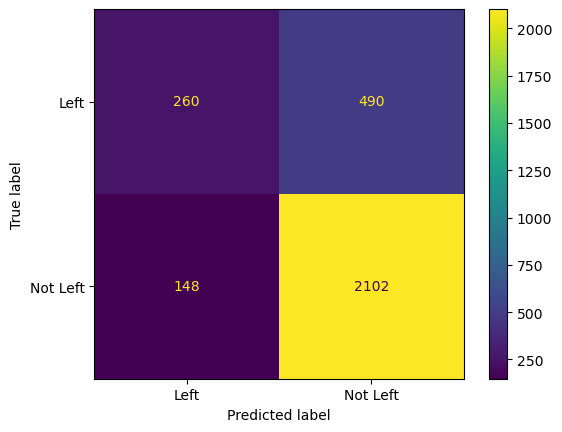

In [62]:
cm_plot.plot();

In [64]:
from sklearn.metrics import recall_score

In [65]:
print(recall_score(y_logreg_v1.actual, y_logreg_v1.predicted))

0.3466666666666667


In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_logreg_v1.actual, y_logreg_v1.predicted))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.64      0.35      0.45       750

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.76      3000



### KNN Model

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
scaler.fit(X_train)

MinMaxScaler()

In [74]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn_clf = KNeighborsClassifier( n_neighbors = 10 )
knn_clf.fit( x_train_scaled, y_train )

KNeighborsClassifier(n_neighbors=10)

In [78]:
knn_test_pred = pd.DataFrame( { 'actual':  y_test,
                                'predicted': knn_clf.predict( x_test_scaled ) } )

In [79]:
cm_knn = confusion_matrix(knn_test_pred.actual, knn_test_pred.predicted, labels = [1,0])

knn_cm_plot = ConfusionMatrixDisplay(cm_knn, 
                                 display_labels=['Left', 'Not Left'])

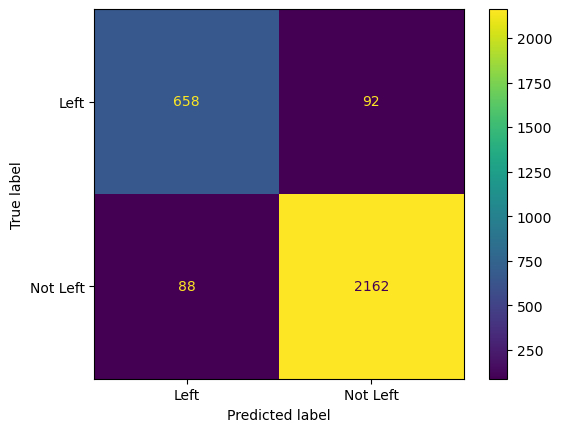

In [80]:
knn_cm_plot.plot();

In [82]:
print(classification_report(knn_test_pred.actual, knn_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2250
           1       0.88      0.88      0.88       750

    accuracy                           0.94      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.94      0.94      0.94      3000



### Grid Search for KNN

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
tuned_parameters = [{'n_neighbors': [5, 10, 15, 20], 
                     "weights": ['uniform', 'distance']}]

In [86]:
clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='recall')

clf.fit(x_train_scaled, y_train )

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [5, 10, 15, 20],
                          'weights': ['uniform', 'distance']}],
             scoring='recall')

In [87]:
clf.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [88]:
clf.best_score_

0.9461149814849683

In [89]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002814,0.000236,0.034092,0.001771,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.882979,0.879433,0.904255,0.895575,0.881206,0.888690,0.009633,5
1,0.002845,0.000036,0.033831,0.000744,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.943262,0.932624,0.953901,0.955752,0.945035,0.946115,0.008304,1
2,0.002779,0.000035,0.037566,0.000136,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.863475,0.861702,0.877660,0.870796,0.852837,0.865294,0.008421,6
3,0.002716,0.000033,0.037811,0.000359,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.939716,0.930851,0.948582,0.952212,0.945035,0.943279,0.007459,2
4,0.002631,0.000037,0.042504,0.000314,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",0.865248,0.845745,0.865248,0.876106,0.858156,0.862101,0.009990,7
5,0.002653,0.000039,0.045685,0.002530,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",0.934397,0.934397,0.945035,0.950442,0.945035,0.941862,0.006406,3
6,0.002642,0.000052,0.050246,0.001022,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",0.851064,0.836879,0.863475,0.867257,0.854610,0.854657,0.010635,8
7,0.002657,0.000095,0.045052,0.001799,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",0.934397,0.930851,0.945035,0.950442,0.943262,0.940798,0.007169,4
